<a href="https://colab.research.google.com/github/Kushagra651/Titanic_eda/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Titanic-Dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

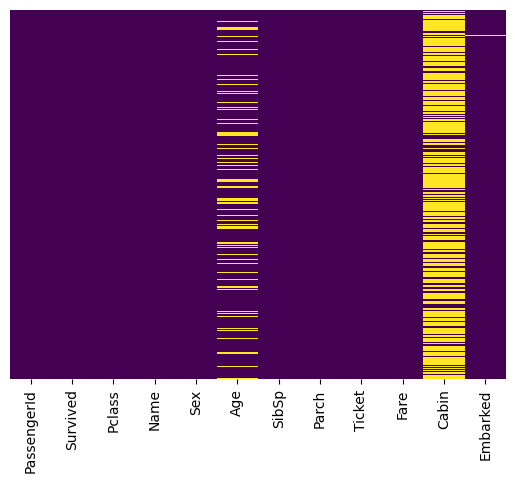

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<ipython-input-13-a7500b3dfcb1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='winter')


<Axes: xlabel='Survived', ylabel='count'>

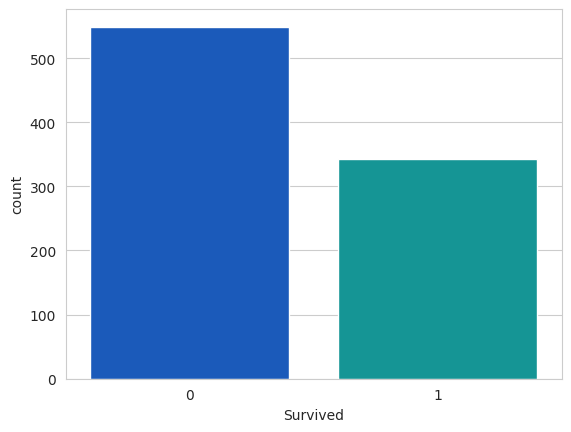

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='winter')

see how manu people survived based on the sex

<Axes: xlabel='Survived', ylabel='count'>

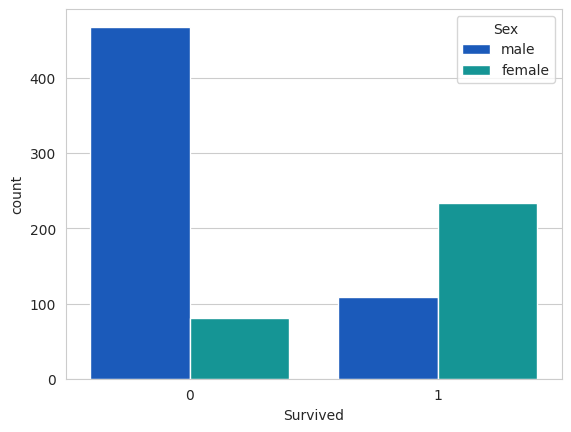

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data = df,palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

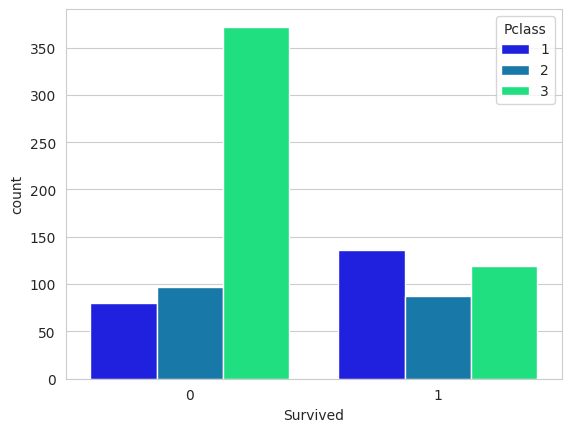

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data = df,palette='winter')

<ipython-input-21-54059b02658a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=True,color='b',bins=30)


<Axes: xlabel='Age', ylabel='Density'>

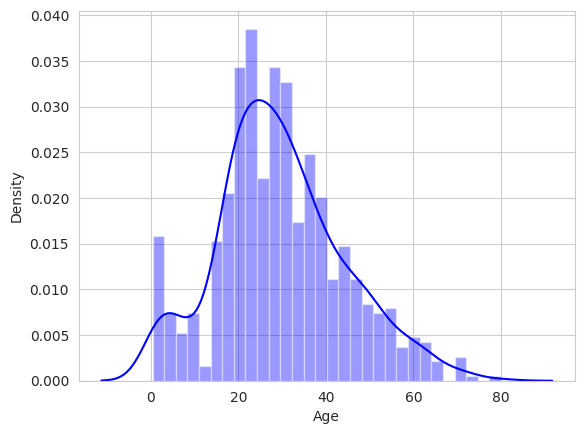

In [21]:
sns.distplot(df['Age'].dropna(),kde=True,color='b',bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

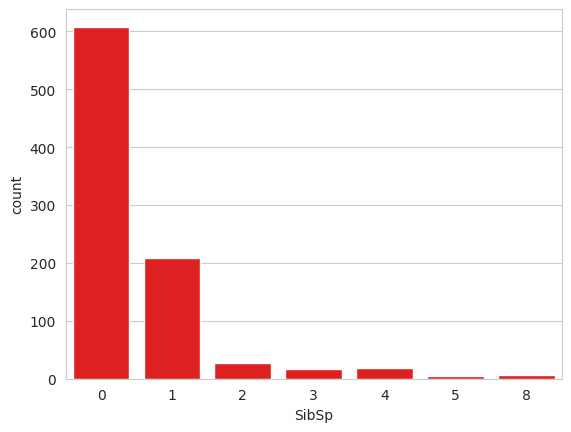

In [25]:
sns.countplot(x='SibSp',data=df,color = 'r')

Data cleaning

<ipython-input-26-1fde0458af4a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

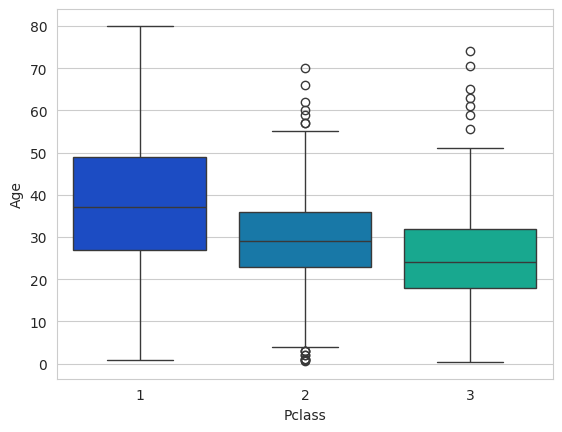

In [26]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [28]:
def impute_age(cols):
  Age = cols[0]
  Pclass  = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass ==2:
      return 29
    else:
      return 24
  else:
    return Age

In [30]:
df['Age'].isnull().sum()

np.int64(177)

In [31]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis = 1)

<ipython-input-28-7a22f339104b>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-28-7a22f339104b>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass  = cols[1]


<Axes: >

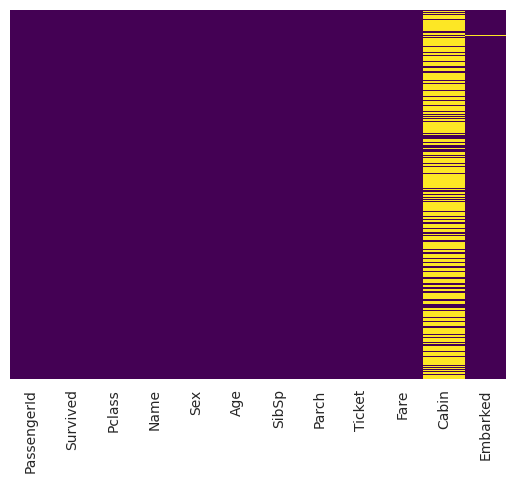

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [34]:
df.drop('Cabin',axis =  1,inplace = True)

In [35]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [38]:
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [39]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [40]:
df.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace = True)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [42]:
df = pd.concat([df,sex,embarked],axis = 1)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


Model Training

In [44]:
df.drop('Survived',axis =1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [45]:
df['Survived'].head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived',axis = 1),df['Survived'],test_size=0.3,random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
log_pred = logmodel.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
accuracy = confusion_matrix(y_test,log_pred)

In [52]:
accuracy

array([[137,  20],
       [ 35,  76]])

In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,log_pred)

In [54]:
accuracy

0.7947761194029851

with the help of logistic regression we are able ot achieve an accuracy fo about 79.47% which is good for a simple model  to  get a better accuracy we can use random forest or other models